In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/samaguiar/Desktop/university-of-the-cumberlands/MSDS_530/week_1/xAPI-Edu-Data.csv')

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
#get 10 random samples
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
311,M,Jordan,Jordan,lowerlevel,G-04,B,Science,S,Father,42,34,29,39,No,Good,Above-7,M
296,F,Jordan,Jordan,lowerlevel,G-04,A,Science,F,Mum,98,87,86,84,No,Good,Under-7,H
209,M,KW,KuwaIT,MiddleSchool,G-08,C,Spanish,S,Father,70,81,39,84,No,Bad,Under-7,M
207,M,KW,KuwaIT,MiddleSchool,G-08,C,Spanish,S,Father,17,21,42,14,Yes,Good,Under-7,M
53,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,49,70,19,75,Yes,Good,Under-7,H
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L
392,F,Iraq,Iraq,MiddleSchool,G-07,A,Biology,F,Mum,86,98,50,20,Yes,Good,Under-7,H
460,M,Iraq,Iraq,MiddleSchool,G-08,A,Geology,F,Father,80,83,82,71,Yes,Good,Above-7,M
356,M,Jordan,Jordan,lowerlevel,G-02,B,French,F,Father,32,88,32,25,Yes,Good,Under-7,M
354,M,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,30,98,42,21,Yes,Good,Under-7,H


In [6]:
# get statistics for interval data
df['raisedhands'].describe()

count    480.000000
mean      46.775000
std       30.779223
min        0.000000
25%       15.750000
50%       50.000000
75%       75.000000
max      100.000000
Name: raisedhands, dtype: float64

Text(0.5, 1.0, 'Engagement: Frequency vs. Number of Raised Hands')

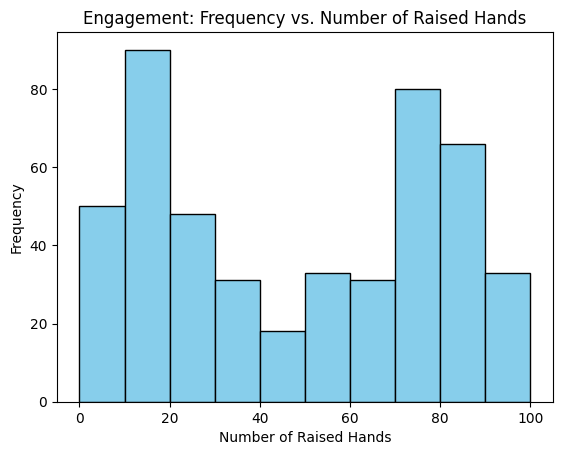

In [7]:
# Create a histogram for interval data
plt.hist(df['raisedhands'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Raised Hands')
plt.ylabel('Frequency')
plt.title('Engagement: Frequency vs. Number of Raised Hands')

([], [])

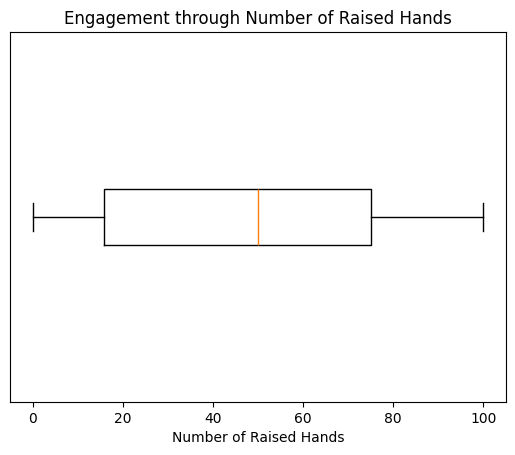

In [8]:
# Create a histogram for interval data
plt.boxplot(df['raisedhands'], vert=False)
plt.xlabel('Number of Raised Hands')
plt.title('Engagement through Number of Raised Hands')

# Customize the y-axis labels to be empty strings
plt.yticks([])

In [9]:
# explore ordinal data
df['GradeID'].describe()

count      480
unique      10
top       G-02
freq       147
Name: GradeID, dtype: object

In [10]:
df['GradeID'].shape

(480,)

In [11]:
# Rename "G_0{i}" to "Grade {i}" or G-{i} to Grade {i}
for i in range(2,13):
    if i<10:
        old_val = f'G-0{i}'
    else:
        old_val = f'G-{i}'
    new_val = f'Grade {i}'
    df['GradeID'] = df['GradeID'].replace(old_val, new_val)


In [12]:
grade_counts = df['GradeID'].value_counts()
grade_counts

GradeID
Grade 2     147
Grade 8     116
Grade 7     101
Grade 4      48
Grade 6      32
Grade 11     13
Grade 12     11
Grade 9       5
Grade 10      4
Grade 5       3
Name: count, dtype: int64

In [13]:
# Define the custom order for the x-axis
custom_order = []

for i in range(2,13):
    new_grade = f'Grade {i}'
    custom_order.append(new_grade)


In [14]:
custom_order

['Grade 2',
 'Grade 3',
 'Grade 4',
 'Grade 5',
 'Grade 6',
 'Grade 7',
 'Grade 8',
 'Grade 9',
 'Grade 10',
 'Grade 11',
 'Grade 12']

In [15]:
grade_counts_df = grade_counts.reset_index()
grade_counts_df

,GradeID,count
0,Grade 2,147
1,Grade 8,116
2,Grade 7,101
3,Grade 4,48
4,Grade 6,32
5,Grade 11,13
6,Grade 12,11
7,Grade 9,5
8,Grade 10,4
9,Grade 5,3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Grade 2'),
  Text(1, 0, 'Grade 3'),
  Text(2, 0, 'Grade 4'),
  Text(3, 0, 'Grade 5'),
  Text(4, 0, 'Grade 6'),
  Text(5, 0, 'Grade 7'),
  Text(6, 0, 'Grade 8'),
  Text(7, 0, 'Grade 9'),
  Text(8, 0, 'Grade 10'),
  Text(9, 0, 'Grade 11'),
  Text(10, 0, 'Grade 12')])

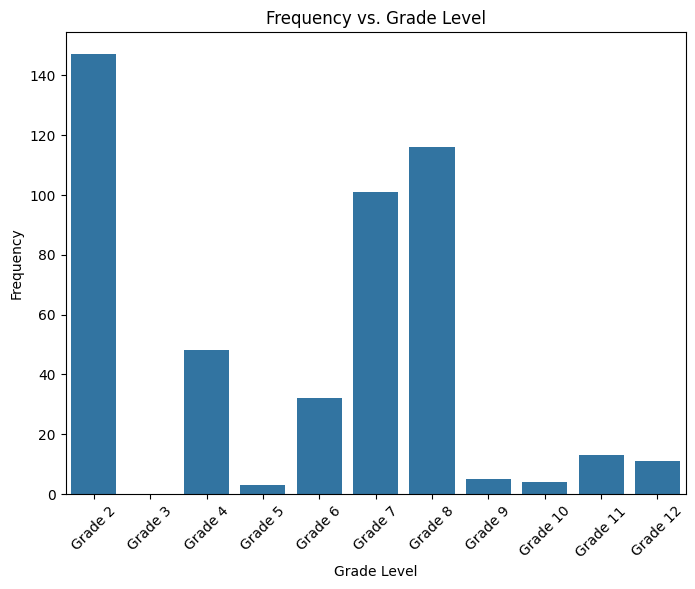

In [16]:
# Create a bar plot with the custom order
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(x='GradeID', y='count', data=grade_counts_df, order=custom_order)
plt.xlabel('Grade Level')
plt.ylabel('Frequency')
plt.title('Frequency vs. Grade Level')
plt.xticks(rotation=45)


In [17]:
# look at classes - explore nominal data 
df['Topic'].describe()

count     480
unique     12
top        IT
freq       95
Name: Topic, dtype: object

In [18]:
df['Topic'].value_counts()

Topic
IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: count, dtype: int64

In [19]:
df['Topic'].count()

480

In [20]:
topic_counts_df = df['Topic'].value_counts().reset_index()
topic_counts_df

,Topic,count
0,IT,95
1,French,65
2,Arabic,59
3,Science,51
4,English,45
5,Biology,30
6,Spanish,25
7,Chemistry,24
8,Geology,24
9,Quran,22


In [21]:
percentages = []
for c in topic_counts_df['count']:
    percent = round((c/df['Topic'].count())*100, 2)
    percentages.append(percent)

percentages

[19.79, 13.54, 12.29, 10.62, 9.38, 6.25, 5.21, 5.0, 5.0, 4.58, 4.38, 3.96]

In [22]:
topic_counts_df['Percentage']=percentages
topic_counts_df

,Topic,count,Percentage
0,IT,95,19.79
1,French,65,13.54
2,Arabic,59,12.29
3,Science,51,10.62
4,English,45,9.38
5,Biology,30,6.25
6,Spanish,25,5.21
7,Chemistry,24,5.00
8,Geology,24,5.00
9,Quran,22,4.58


In [23]:
# create a Paerto chart

# Sort the DataFrame in descending order by count
topic_counts_df = topic_counts_df.sort_values(by='count', ascending=False)
topic_counts_df


,Topic,count,Percentage
0,IT,95,19.79
1,French,65,13.54
2,Arabic,59,12.29
3,Science,51,10.62
4,English,45,9.38
5,Biology,30,6.25
6,Spanish,25,5.21
7,Chemistry,24,5.00
8,Geology,24,5.00
9,Quran,22,4.58


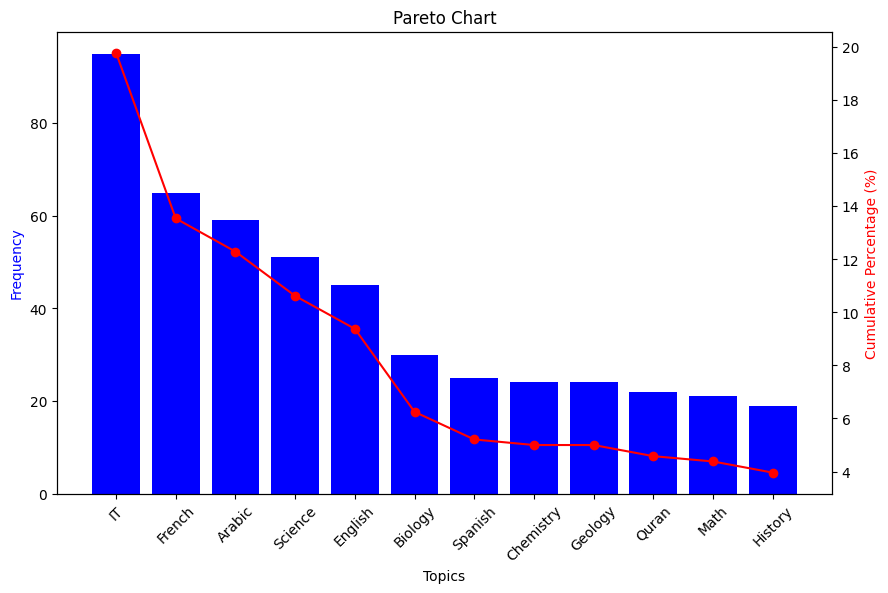

In [24]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for frequencies
ax1.bar(topic_counts_df['Topic'], topic_counts_df['count'], color='b')
ax1.set_xlabel('Topics')
ax1.set_ylabel('Frequency', color='b')
plt.xticks(rotation=45)
# Secondary vertical axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(topic_counts_df['Topic'], topic_counts_df['Percentage'], marker='o', color='r')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
plt.title('Pareto Chart')
plt.show()

/var/folders/vf/0yw20dw90l92_8x0mb2lggsw0000gn/T/ipykernel_63477/1343964543.py:2: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(topic_counts_df['count'], labels = topic_counts_df['Topic'], title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))


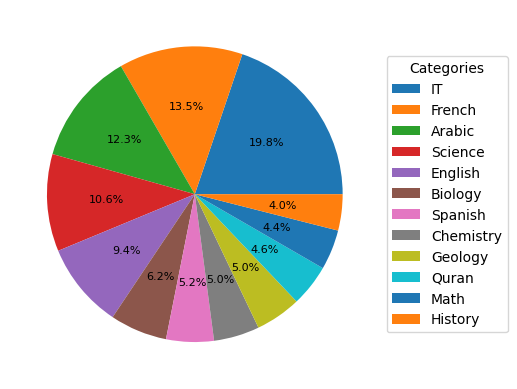

In [25]:
plt.pie(topic_counts_df['count'], autopct='%1.1f%%', textprops={'fontsize': 8})
plt.legend(topic_counts_df['count'], labels = topic_counts_df['Topic'], title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))

